# 13-2

Los datos que se presentan en la siguiente tabla representan el número de horas de alivio proporciona- das por cinco marcas diferentes de tabletas para el do- lor de cabeza administradas a 25 sujetos que tenían iebre de 38oC o más. Realice el análisis de varianza y, a un nivel de signiicancia de 0.05, pruebe la hipótesis de que las cinco marcas proporcionan el mismo núme- ro medio de horas de alivio. Analice los resultados.

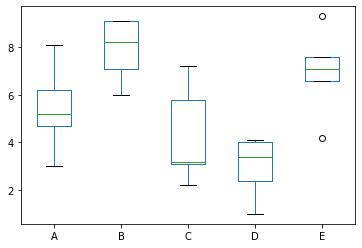

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


df=pd.read_csv("3.3.13.2.csv")
df
df.boxplot(column=['A', 'B', 'C', 'D', 'E'], grid=False)

A pesar de que la gráfica ayuda bastante y la respuesta parece obvia, obtengamos una respuesta analítica

In [16]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# Convertimos la tabla en formato similar a R
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D', 'E'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

17.492810457516338 2.639241146210922e-05


,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),4.0,78.4216,19.6054,6.586508,0.001497
Residual,20.0,59.5320,2.9766,NaN,NaN


Tenemos las hipotesis:

$$H_0: \mu_1 = \mu_2 = \mu_3 ... \mu_5$$
$$H_1: \text{Al menos dos son no iguales}$$

$\alpha = 0.05$ con region crítica f > 2.87 y con 4 y 20 grados de libertad

Como P es 0.0015, podemos rechazar $H_0$




Fuente : "https://reneshbedre.github.io/blog/anova.html"